In [14]:
import random

lines = [[(random.uniform(1, 1000), random.uniform(1, 1000)),(random.uniform(1, 1000), random.uniform(1, 1000))] for _ in range(50)]

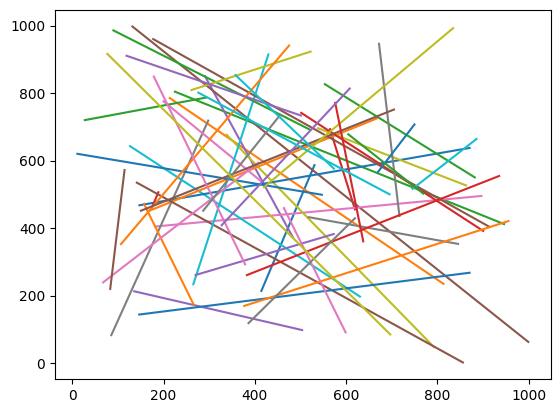

In [15]:
import matplotlib.pyplot as plt 

for i in lines:
    plt.plot([i[0][0], i[1][0]], [i[0][1], i[1][1]])
plt.show()

In [16]:
def determinant(matrix):
    a, b, c = matrix[0]
    d, e, f = matrix[1]
    g, h, i = matrix[2]

    det = a * (e * i - f * h) - b * (d * i - f * g) + c * (d * h - e * g)
    return det

def intersect(p1, p2, p3, p4):
    matrix123 = [
    [p1[0], p1[1], 1],
    [p2[0], p2[1], 1],
    [p3[0], p3[1], 1]
    ]
    matrix124 = [
    [p1[0], p1[1], 1],
    [p2[0], p2[1], 1],
    [p4[0], p4[1], 1]
    ]
    matrix341 = [
    [p3[0], p3[1], 1],
    [p4[0], p4[1], 1],
    [p1[0], p1[1], 1]
    ]
    matrix342 = [
    [p3[0], p3[1], 1],
    [p4[0], p4[1], 1],
    [p2[0], p2[1], 1]
    ]

    s123 = determinant(matrix123)
    s124 = determinant(matrix124)

    LAN = s123 / (s123 - s124)

    if (LAN >= 0) and (LAN <= 1):
        s341 = determinant(matrix341)
        s342 = determinant(matrix342)

        MU = s341 / (s341 - s342)
        
        if (MU >= 0) and (MU <= 1):
            x = (1 - LAN) * p3[0] + LAN * p4[0]
            y = (1 - LAN) * p3[1] + LAN * p4[1]
            return True, (x, y)
    return False, (0, 0)


In [17]:
points = []
for i in range(len(lines)):
    for j in range(i + 1, len(lines)):
        Bool, point = intersect(lines[i][0], lines[i][1], lines[j][0], lines[j][1])
        if Bool == True:
            points.append(point)

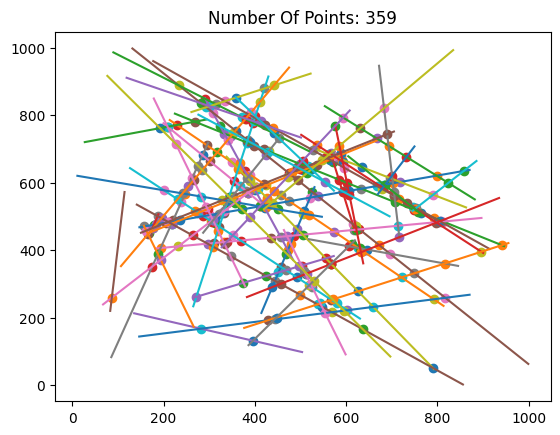

In [25]:
import matplotlib.pyplot as plt 

for i in lines:
    plt.plot([i[0][0], i[1][0]], [i[0][1], i[1][1]])
for p in points:
    plt.scatter(p[0], p[1])
plt.title(f"Number Of Points: {len(points)}")
plt.show()